In [19]:
import numpy as np
import pandas as pd
import pandas_ta as ta
from sklearn.preprocessing import StandardScaler

from pca import add_features
from pca import add_labels
from pca import prepare
from pycaret.classification import *

# %%
symbol = "TQQQ"
df = prepare(symbol)
df.drop(['open','high','low','close','lf_max_high','lf_min_low'],axis=1,inplace=True)
df.drop(['volume', 'BTO','STO'],axis=1,inplace=True)
df.dropna(inplace=True)

In [39]:
#setup(data=df, target='target')
def model_this(df):
    setup(data=df, target='target',
    normalize=True,
    pca=False,
    use_gpu=True,
    silent=True,
    bin_numeric_features=[
        'RSI_9',        'RSI_14',
        'SMA_9', 'SMA_21',
    'SMA_34',
    'SMA_50',
    'SMA_100',
    'SMA_150',

    ],
    numeric_features=[
        'PCTRET_1', 
        'PCTRET_5',
        'PCTRET_10',
    'ADX',
    'MACD',
    ],
    categorical_features=[
        'SMA_STACKED',
        'ADX_TREND',
        'RSI_FLAG',
        'SQZ_ON'
    ])
    best_model = compare_models(turbo=False)
    return best_model

model_this(df)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5550,0.7642,0.4884,0.5523,0.5475,0.3557,0.3582,0.7790
et,Extra Trees Classifier,0.5259,0.7526,0.4653,0.5228,0.5202,0.3159,0.3177,0.5350
gpc,Gaussian Process Classifier,0.5249,0.7177,0.4662,0.5227,0.5179,0.3139,0.3157,3.2040
lightgbm,Light Gradient Boosting Machine,0.5161,0.7314,0.4611,0.5139,0.5104,0.3020,0.3034,0.4090
gbc,Gradient Boosting Classifier,0.4907,0.7033,0.4427,0.4861,0.4814,0.2642,0.2667,1.6850
mlp,MLP Classifier,0.4880,0.6965,0.4490,0.4876,0.4856,0.2665,0.2672,4.5040
knn,K Neighbors Classifier,0.4767,0.6907,0.4014,0.4797,0.4654,0.2325,0.2365,0.3370
dt,Decision Tree Classifier,0.4497,0.6078,0.4329,0.4506,0.4488,0.2189,0.2193,0.0330
ridge,Ridge Classifier,0.4445,0.0000,0.3846,0.4421,0.4326,0.1924,0.1944,0.0180
lr,Logistic Regression,0.4388,0.6511,0.3821,0.4361,0.4296,0.1868,0.1884,0.1510


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2005, verbose=0,
                       warm_start=False)

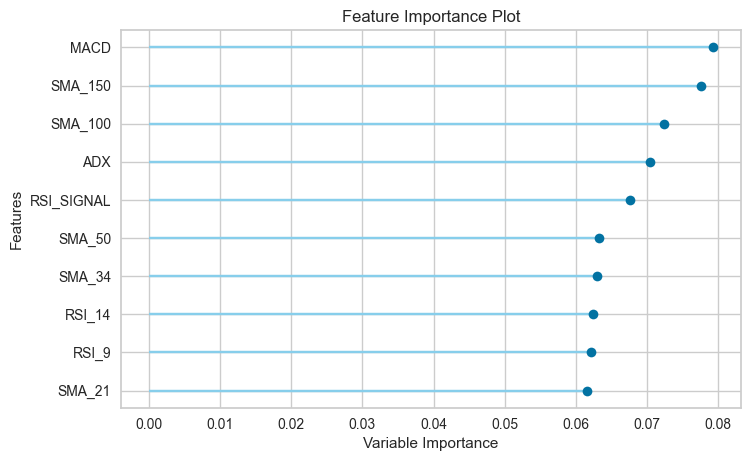

In [31]:
model_et = create_model('et')
plot_model(model_et, plot='feature')
#predict_model(model_et, data=df)

In [37]:
def prepare_trade(symbol):
    df = prepare(symbol)
    df['target'] = np.where(df.BTO + df.STO == 0, 'hold', 'tbd')
    df.loc[ (df.BTO == 1 ) & (df.STO == 0), 'target' ] = 'BTO'
    df.loc[ (df.BTO == 0 ) & (df.STO == 1), 'target' ] = 'STO'
    df.drop(['open','high','low','close','lf_max_high','lf_min_low'],axis=1,inplace=True)
    df.drop(['volume', 'BTO','STO'],axis=1,inplace=True)
    df.dropna(inplace=True)
    
    return df
df = prepare_trade('TQQQ')
best_model = model_this(df)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5757,0.7941,0.5111,0.5748,0.5683,0.3847,0.3882,0.4680
rf,Random Forest Classifier,0.5752,0.7779,0.5009,0.5683,0.5637,0.3817,0.3860,0.5870
lightgbm,Light Gradient Boosting Machine,0.5425,0.7459,0.4758,0.5365,0.5348,0.3377,0.3395,0.3200
gpc,Gaussian Process Classifier,0.5171,0.7079,0.4433,0.5084,0.5003,0.2959,0.3008,2.8920
knn,K Neighbors Classifier,0.5036,0.6972,0.4166,0.4963,0.4884,0.2705,0.2749,0.0530
gbc,Gradient Boosting Classifier,0.4989,0.7054,0.4372,0.4902,0.4824,0.2685,0.2744,2.2310
mlp,MLP Classifier,0.4881,0.6968,0.4421,0.4847,0.4824,0.2648,0.2662,3.5580
dt,Decision Tree Classifier,0.4766,0.6291,0.4437,0.4817,0.4762,0.2580,0.2593,0.0310
rbfsvm,SVM - Radial Kernel,0.4694,0.6722,0.3711,0.4751,0.3985,0.2032,0.2297,0.6590
ridge,Ridge Classifier,0.4492,0.0000,0.3536,0.4210,0.3970,0.1774,0.1914,0.0100


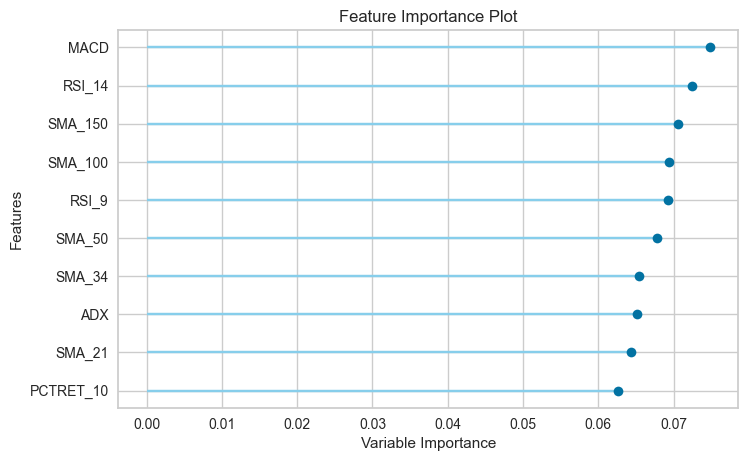

In [38]:
model = create_model('et')
plot_model(model, plot='feature')

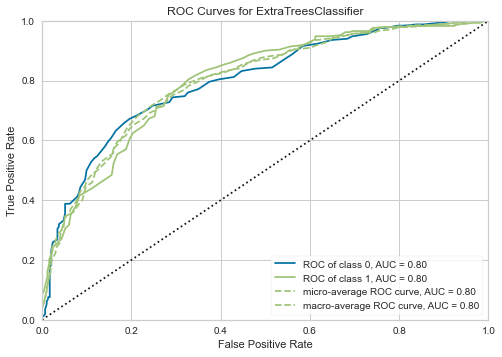

In [11]:
plot_model(model)

In [12]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6772,0.6548,0.9028,0.6566,0.7602,0.3021,0.3402
1,0.6614,0.7078,0.8194,0.6629,0.7329,0.2844,0.2965
2,0.6746,0.6983,0.8732,0.6596,0.7515,0.3058,0.3320
3,0.6667,0.7939,0.9155,0.6436,0.7558,0.2780,0.3245
4,0.5794,0.6566,0.7887,0.5957,0.6788,0.1027,0.1115
5,0.6190,0.6510,0.8169,0.6237,0.7073,0.1891,0.2036
6,0.6349,0.6404,0.7917,0.6477,0.7125,0.2260,0.2346
7,0.6984,0.7451,0.9028,0.6771,0.7738,0.3480,0.3819
8,0.6349,0.6409,0.8194,0.6413,0.7195,0.2184,0.2323
9,0.5794,0.6389,0.7222,0.6118,0.6624,0.1146,0.1174


<AxesSubplot:xlabel='date'>

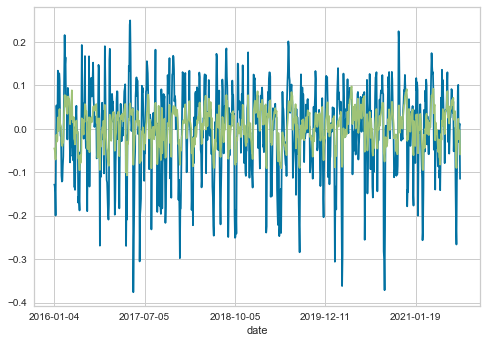

In [18]:
df = df[df.index > '2016-01-01']
df.RSI_SIGNAL.plot()
#df.RSI_9.plot()
#df.RSI_14.plot()
(df.RSI_9 - df.RSI_14).plot()
